In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import xarray as xr
import os
import sys
import glob
import datetime
# Read station metadata from the Excel file
stations = pd.read_excel('/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx')

In [2]:
%%time
file_path = '/g/data/w28/yk8692/nesp'
region_name = "Brisbane"
region_name_full = "Greater Brisbane"
# Load the Greater Sydney shapefile
gccsa = gpd.read_file(f"{file_path}/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp")
# gccsa = gpd.read_file("Greater Capital City Statistical Areas - 2021 - Shapefile.shp")
print("Shapefile columns:", gccsa.columns.tolist())
re_shp = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
print(f"Number of polygons for {region_name_full}:", len(re_shp))

# Convert station metadata into a GeoDataFrame.
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['Longitude'], stations['Latitude']),
    crs="EPSG:4326"
)

# If necessary
if re_shp.crs != stations_gdf.crs:
    re_shp = re_shp.to_crs(stations_gdf.crs)

# Filter stations that fall within the Greater Sydney region.
stations_in_region = stations_gdf[stations_gdf.within(re_shp.unary_union)]
print(f"Found {len(stations_in_region)} AWS stations within {region_name_full}.")

# Plot the Greater Sydney region and the stations.
fig, ax = plt.subplots(figsize=(10, 10))
re_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
stations_in_region.plot(ax=ax, color='red', markersize=50, label='AWS Stations')

# Set the plot extent to the bounds of the Sydney shapefile.
minx, miny, maxx, maxy = re_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title(f"AWS Stations within {region_name_full} Region")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


Shapefile columns: ['GCC_CODE21', 'GCC_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'geometry']
Number of polygons for Greater Melbourne: 1
Found 16 AWS stations within Greater Sydney.


In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Read station metadata from the Excel file
stations = pd.read_excel('/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx')
file_path = '/g/data/w28/yk8692/nesp'
region_name = "Adelaide"
region_name_full = "Greater Adelaide"
# Load the Greater Sydney shapefile
gccsa = gpd.read_file(f"{file_path}/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp")
# gccsa = gpd.read_file("Greater Capital City Statistical Areas - 2021 - Shapefile.shp")
print("Shapefile columns:", gccsa.columns.tolist())
re_shp = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
print(f"Number of polygons for {region_name_full}:", len(re_shp))

# Convert station metadata into a GeoDataFrame.
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['Longitude'], stations['Latitude']),
    crs="EPSG:4326"
)

# If necessary
if re_shp.crs != stations_gdf.crs:
    re_shp = re_shp.to_crs(stations_gdf.crs)

# Filter stations
stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()

# Assign unique index numbers for display
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# Plot Greater Melbourne region and AWS stations
fig, ax = plt.subplots(figsize=(12, 10))
re_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
stations_in_region.plot(ax=ax, color='red', markersize=50, label='AWS Stations')

# Add index numbers to stations instead of full station numbers
for i, row in stations_in_region.iterrows():
    if i == 10:
        loc = -10
    else:
        loc = 3
    ax.annotate(
        text=str(row["Index"]),  # Show index instead of station number
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, loc), textcoords="offset points",
        fontsize=10, color="black", fontweight="bold"
    )

# Set plot limits
minx, miny, maxx, maxy = re_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title(f"AWS within {region_name_full} Region")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create a separate station list on the side
station_list_text = "\n".join([f"{row.Index}. {row['Station_name']} ({row['Station_number']})" for _, row in stations_in_region.iterrows()])
plt.figtext(0.85, 0.5, station_list_text, fontsize=10, ha="left", va="center", bbox=dict(facecolor='white', alpha=0.7))
plt.savefig(f"{file_path}/figure/{region_name}_aws_map.jpg", dpi=300, bbox_inches='tight')

plt.show()


Shapefile columns: ['GCC_CODE21', 'GCC_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'geometry']
Number of polygons for Greater Adelaide: 1


/jobfs/142702121.gadi-pbs/ipykernel_1767523/400972319.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Read station metadata from the Excel file
stations = pd.read_excel('/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx')
file_path = '/g/data/w28/yk8692/nesp'
region_name = "Perth"
region_name_full = "Greater Perth"
# Load the Greater Sydney shapefile
gccsa = gpd.read_file(f"{file_path}/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp")
# gccsa = gpd.read_file("Greater Capital City Statistical Areas - 2021 - Shapefile.shp")
print("Shapefile columns:", gccsa.columns.tolist())
re_shp = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
print(f"Number of polygons for {region_name_full}:", len(re_shp))

# Convert station metadata into a GeoDataFrame.
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['Longitude'], stations['Latitude']),
    crs="EPSG:4326"
)

# If necessary
if re_shp.crs != stations_gdf.crs:
    re_shp = re_shp.to_crs(stations_gdf.crs)

# Filter stations
stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()

# Assign unique index numbers for display
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# Plot Greater Melbourne region and AWS stations
fig, ax = plt.subplots(figsize=(12, 10))
re_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
stations_in_region.plot(ax=ax, color='red', markersize=50, label='AWS Stations')

# Add index numbers to stations instead of full station numbers
for i, row in stations_in_region.iterrows():
    if i == 10:
        loc = -10
    else:
        loc = 3
    ax.annotate(
        text=str(row["Index"]),  # Show index instead of station number
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, loc), textcoords="offset points",
        fontsize=10, color="black", fontweight="bold"
    )

# Set plot limits
minx, miny, maxx, maxy = re_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title(f"AWS Stations within {region_name_full} Region")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create a separate station list on the side
station_list_text = "\n".join([f"{row.Index}. {row['Station_name']} ({row['Station_number']})" for _, row in stations_in_region.iterrows()])
plt.figtext(0.85, 0.5, station_list_text, fontsize=10, ha="left", va="center", bbox=dict(facecolor='white', alpha=0.7))

plt.show()


Shapefile columns: ['GCC_CODE21', 'GCC_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'geometry']
Number of polygons for Greater Perth: 1


/jobfs/141765164.gadi-pbs/ipykernel_779639/286742174.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Read station metadata from the Excel file
stations = pd.read_excel('/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx')
file_path = '/g/data/w28/yk8692/nesp'
region_name = "Brisbane"
region_name_full = "Greater Brisbane"
# Load the Greater Sydney shapefile
gccsa = gpd.read_file(f"{file_path}/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp")
# gccsa = gpd.read_file("Greater Capital City Statistical Areas - 2021 - Shapefile.shp")
print("Shapefile columns:", gccsa.columns.tolist())
re_shp = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
print(f"Number of polygons for {region_name_full}:", len(re_shp))

# Convert station metadata into a GeoDataFrame.
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['Longitude'], stations['Latitude']),
    crs="EPSG:4326"
)

# If necessary
if re_shp.crs != stations_gdf.crs:
    re_shp = re_shp.to_crs(stations_gdf.crs)

# Filter stations
stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()

# Assign unique index numbers for display
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# Plot Greater Melbourne region and AWS stations
fig, ax = plt.subplots(figsize=(12, 10))
re_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
stations_in_region.plot(ax=ax, color='red', markersize=50, label='AWS Stations')

# Add index numbers to stations instead of full station numbers
for i, row in stations_in_region.iterrows():
    if i == 10:
        loc = -10
    else:
        loc = 3
    ax.annotate(
        text=str(row["Index"]),  # Show index instead of station number
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, loc), textcoords="offset points",
        fontsize=10, color="black", fontweight="bold"
    )

# Set plot limits
minx, miny, maxx, maxy = re_shp.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

ax.set_title(f"AWS Stations within {region_name_full} Region")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create a separate station list on the side
station_list_text = "\n".join([f"{row.Index}. {row['Station_name']} ({row['Station_number']})" for _, row in stations_in_region.iterrows()])
plt.figtext(0.85, 0.5, station_list_text, fontsize=10, ha="left", va="center", bbox=dict(facecolor='white', alpha=0.7))

plt.show()


Shapefile columns: ['GCC_CODE21', 'GCC_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'geometry']
Number of polygons for Greater Brisbane: 1


/jobfs/141765164.gadi-pbs/ipykernel_779639/1162938554.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region= stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index()


In [ ]:
def load_station_data(station_number, data_dir=f'{file_path}/station'):
    station_num_str = f"{int(station_number):06d}"
    pattern = os.path.join(data_dir, f"HD01D_Data_{station_num_str}_*.nc")
    file_list = glob.glob(pattern)
    if not file_list:
        print(f"No NetCDF files found for station {station_num_str}")
        return None
    try:
        ds = xr.open_mfdataset(file_list, combine='by_coords')
        return ds
    except Exception as e:
        print(f"Error loading station {station_num_str}: {e}")
        return None

sydney_station_data = {}
for idx, row in stations_in_sydney.iterrows():
    station_num = row["Station_number"]
    ds = load_station_data(station_num)
    if ds is not None:
        key = f"{int(station_num):06d}"
        sydney_station_data[key] = ds

print("Loaded data for the following station(s):", list(sydney_station_data.keys()))

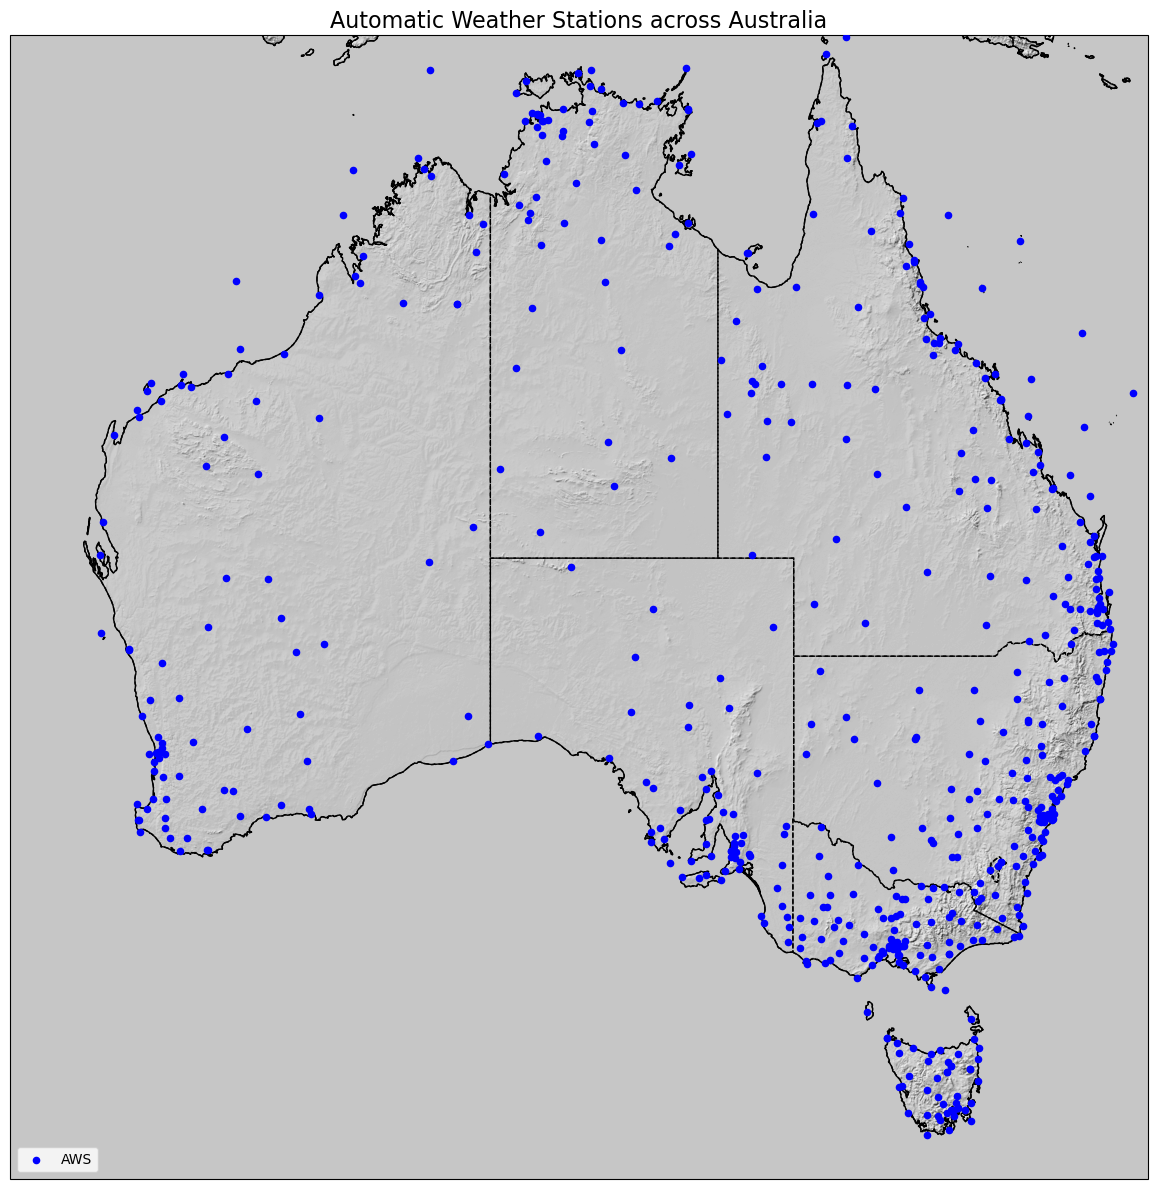

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import rasterio

# === Setup paths ===
file_path = '/g/data/w28/yk8692/nesp/testing_script'
stations_file = '/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx'
out_figure_path = '/g/data/w28/yk8692/nesp/figure/minimum_domains'
os.makedirs(out_figure_path, exist_ok=True)

# === Load GCCSA shapefile (just for Australia coastline) ===
gccsa_shp = f"{file_path}/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
gccsa = gpd.read_file(gccsa_shp).to_crs(epsg=4326)

# === Load AWS station metadata ===
stations_df = pd.read_excel(stations_file)
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs="EPSG:4326"
)

# === Create national map ===
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([110, 155, -45, -10], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('10m'), linestyle='--')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')

# === Plot Topography as background ===
with rasterio.open(f"{out_figure_path}/raster/SR_HR.tif") as src:
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
    image = src.read(1)

ax.imshow(image, extent=extent, transform=ccrs.PlateCarree(), cmap='gray', alpha=1)

# === Plot AWS Stations ===
stations_gdf.plot(
    ax=ax,
    color='blue', markersize=20,
    transform=ccrs.PlateCarree(),
    label='AWS', zorder=5
)

# === Final touch ===
ax.legend(loc='lower left')
ax.set_title("Automatic Weather Stations across Australia", fontsize=16)
plt.tight_layout()

# Save
summary_map_path = f"{out_figure_path}/summary_aws_stations_australia_topo.png"
plt.savefig(summary_map_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.mask import mask
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box

# ------------------------
# Paths and Region Setup
# ------------------------
stations_file = '/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx'
gccsa_shp     = '/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp'
srtm_path     = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'

region_name      = "Sydney"
region_name_full = "Greater Sydney"

# ------------------------
# Load Data
# ------------------------
stations = pd.read_excel(stations_file, engine='openpyxl')
gccsa = gpd.read_file(gccsa_shp)
re_shp = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)].to_crs("EPSG:4326")

# Convert stations to GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations['Longitude'], stations['Latitude']),
    crs="EPSG:4326"
)

# Filter stations within region
stations_in_region = stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# ------------------------
# Mask SRTM to region bounds
# ------------------------
# Get bounding box for SRTM crop
minx, miny, maxx, maxy = re_shp.total_bounds
bbox_geom = [box(minx, miny, maxx, maxy)]
bbox_gdf = gpd.GeoDataFrame(geometry=bbox_geom, crs="EPSG:4326")

# Open SRTM and mask
with rasterio.open(srtm_path) as src:
    out_image, out_transform = mask(src, bbox_gdf.geometry, crop=True)
    out_meta = src.meta.copy()
    srtm_extent = [out_transform[2], 
                   out_transform[2] + out_transform[0] * out_image.shape[2],
                   out_transform[5] + out_transform[4] * out_image.shape[1],
                   out_transform[5]]

# ------------------------
# Plot DEM + AWS
# ------------------------
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('10m'), linestyle='--')

# Plot SRTM DEM
dem_data = np.squeeze(out_image).astype(float)

# Mask out NoData values
with rasterio.open(srtm_path) as src:
    nodata_val = src.nodata
    if nodata_val is not None:
        dem_data[dem_data == nodata_val] = np.nan
    else:
        # Fallback for typical SRTM placeholder
        dem_data[dem_data > 1e5] = np.nan

img = ax.imshow(
    dem_data,
    cmap='terrain',
    extent=srtm_extent,
    transform=ccrs.PlateCarree(),
    origin='upper',
    zorder=1
)

# Plot region boundary
re_shp.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5, zorder=2)

# Plot AWS stations
stations_in_region.plot(ax=ax, color='red', markersize=50, zorder=3)

# Annotate station index
for i, row in stations_in_region.iterrows():
    ax.annotate(
        text=str(row["Index"]),
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=10,
        color="black",
        fontweight="bold",
        zorder=4
    )

# Title and legend
ax.set_title(f"SRTM DEM and AWS in {region_name_full}", fontsize=16)
cbar = plt.colorbar(img, ax=ax, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Elevation (m)", fontsize=12)

plt.tight_layout()
plt.show()


/jobfs/142724846.gadi-pbs/ipykernel_931012/114718072.py:36: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(re_shp.unary_union)].reset_index(drop=True)


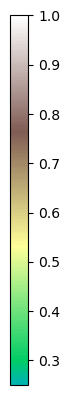

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.25, maxval=1.0, n=256):
    """Truncate a colormap to exclude low-end (e.g., blue) values."""
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Create truncated terrain colormap
terrain = plt.get_cmap('terrain')
truncated_terrain = truncate_colormap(terrain, 0.20, 1.0)

# Create figure and colorbar
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=0.25, vmax=1.0)
sm = cm.ScalarMappable(cmap=truncated_terrain, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
ax.remove()

plt.show()

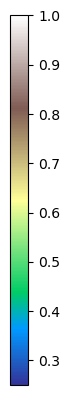

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def truncate_colormap(cmap, minval=0.25, maxval=1.0, n=256):
    """Truncate a colormap to exclude low-end (e.g., blue) values."""
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Create truncated terrain colormap
terrain = plt.get_cmap('terrain')
truncated_terrain = truncate_colormap(terrain, 0.0, 1.0)

# Create figure and colorbar
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=0.25, vmax=1.0)
sm = cm.ScalarMappable(cmap=truncated_terrain, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
ax.remove()

plt.show()

/jobfs/143300566.gadi-pbs/ipykernel_3289912/3649370301.py:72: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)
/jobfs/143300566.gadi-pbs/ipykernel_3289912/3649370301.py:72: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)
/jobfs/143300566.gadi-pbs/ipykernel_3289912/3649370301.py:72: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)
/jobfs/143300566.gadi-pbs/ipykernel_3289912/3649370301.py:72: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = station

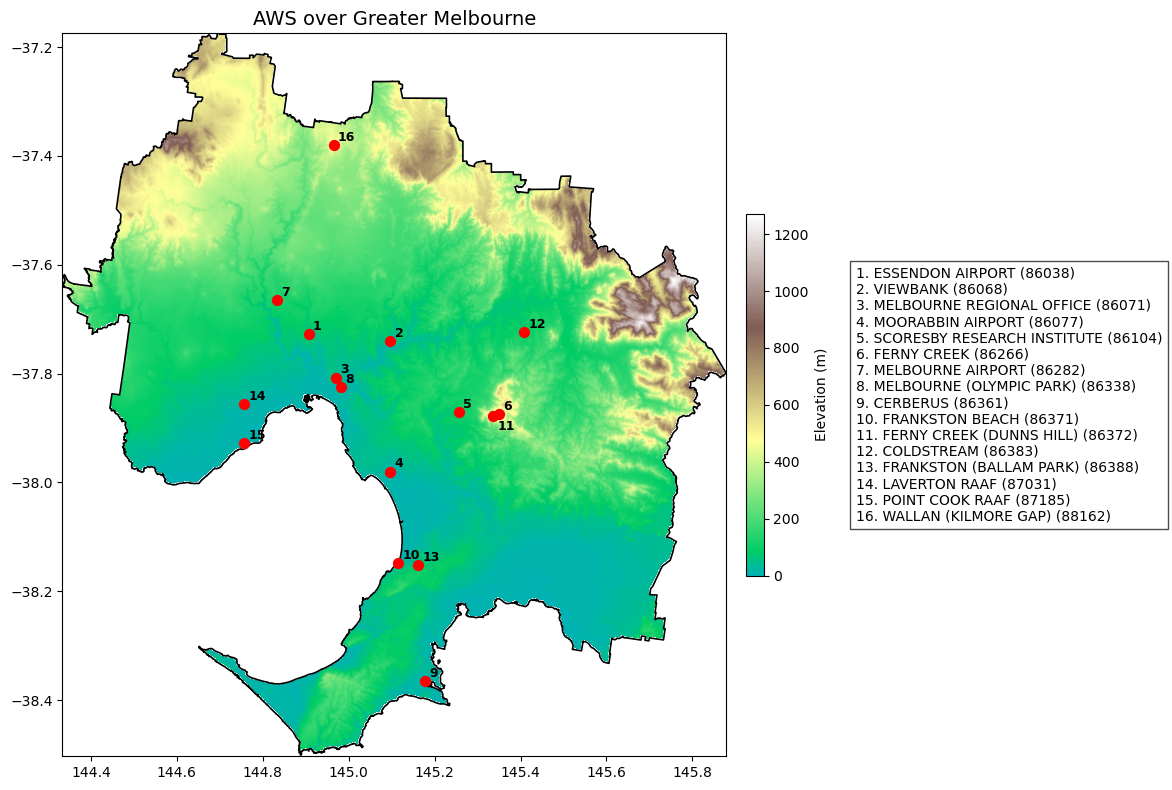

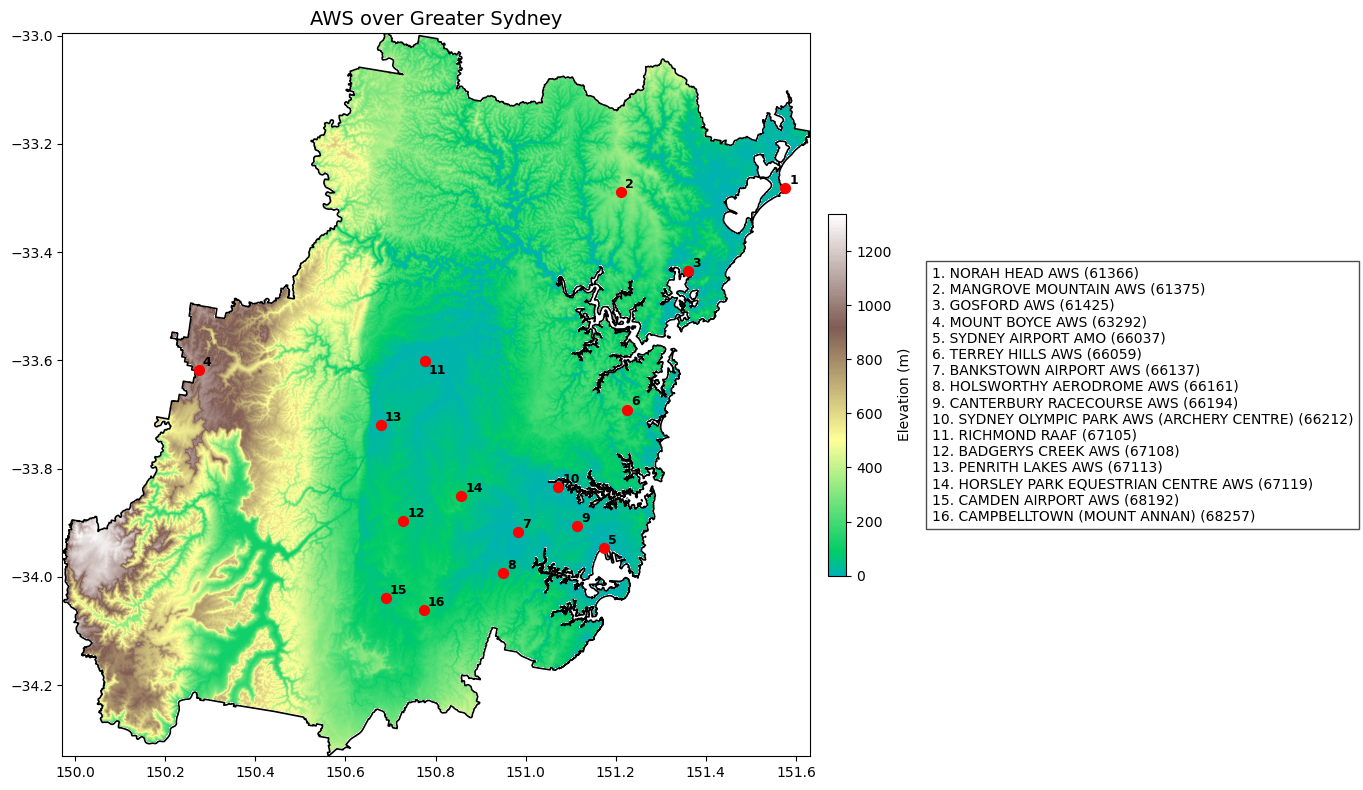

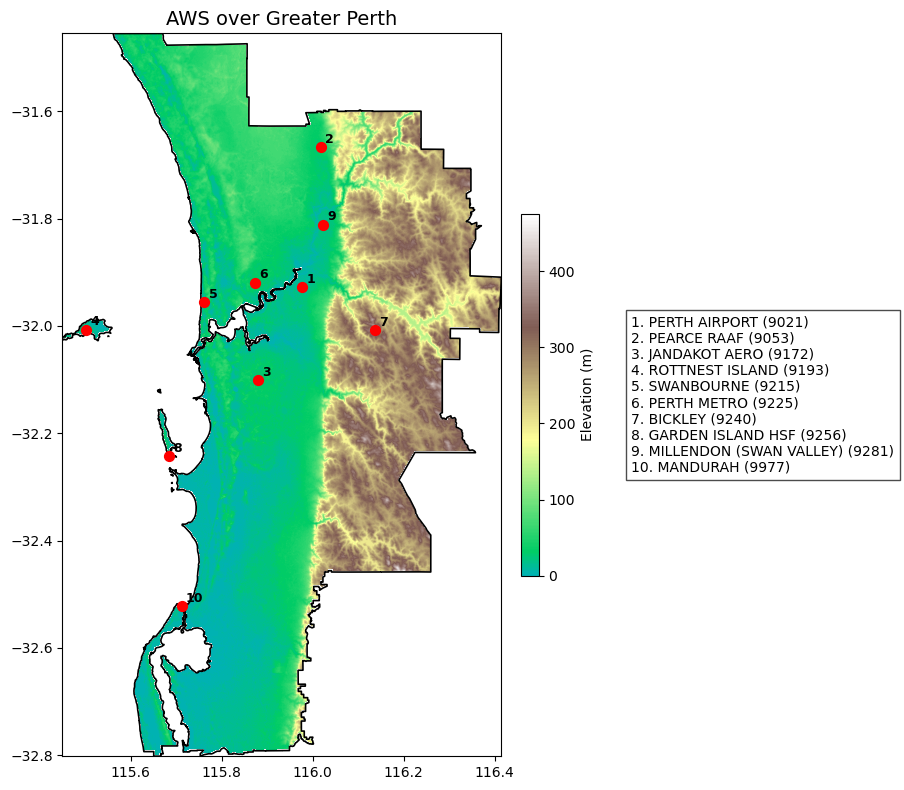

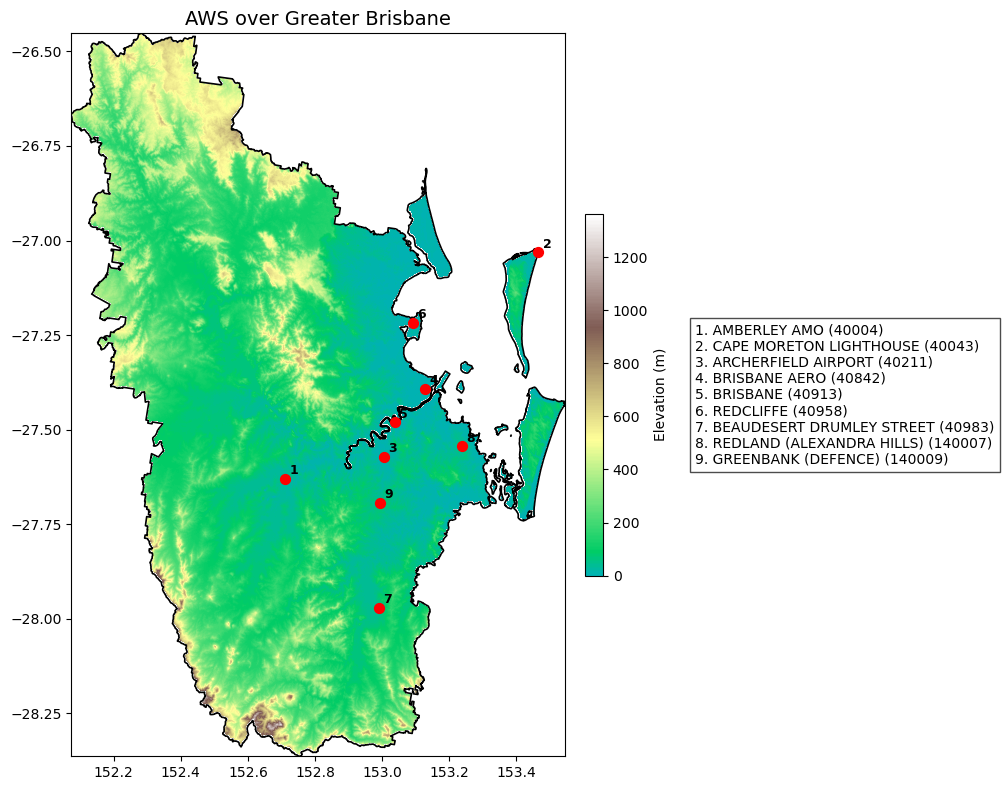

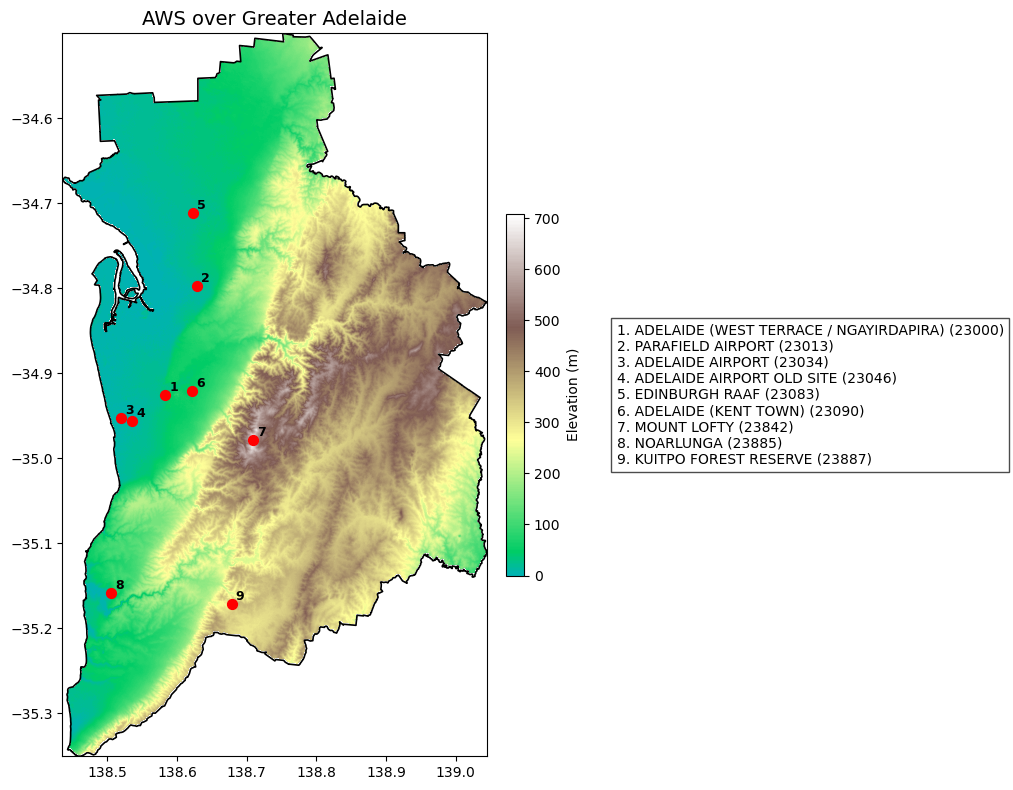

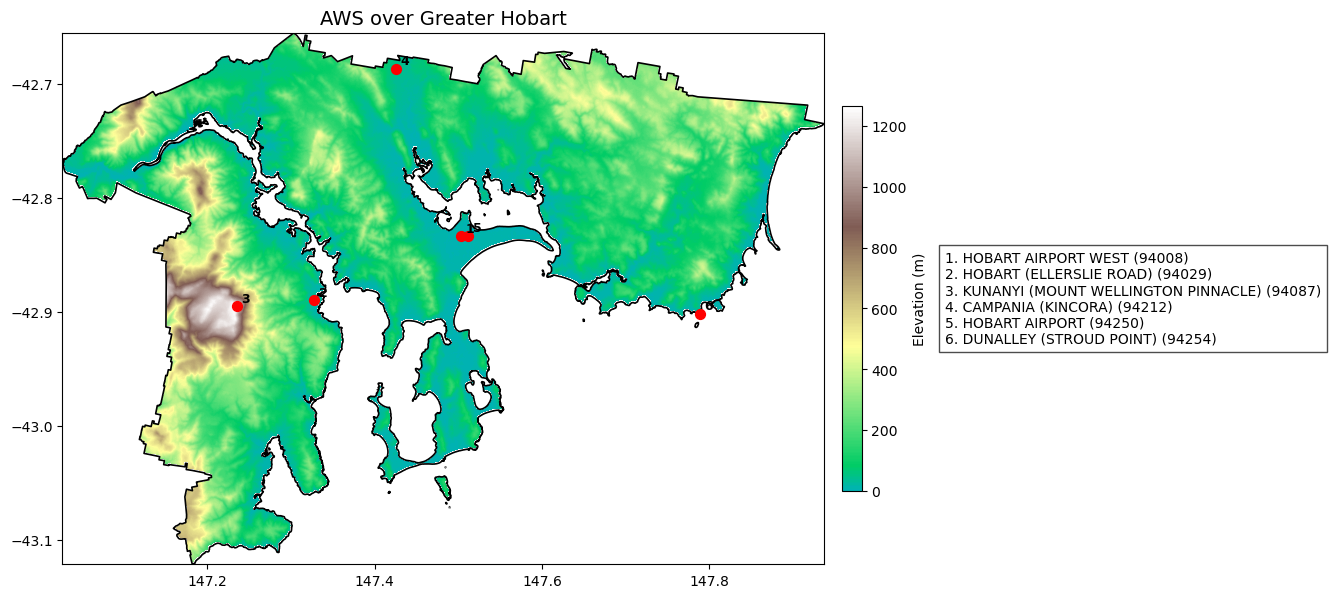

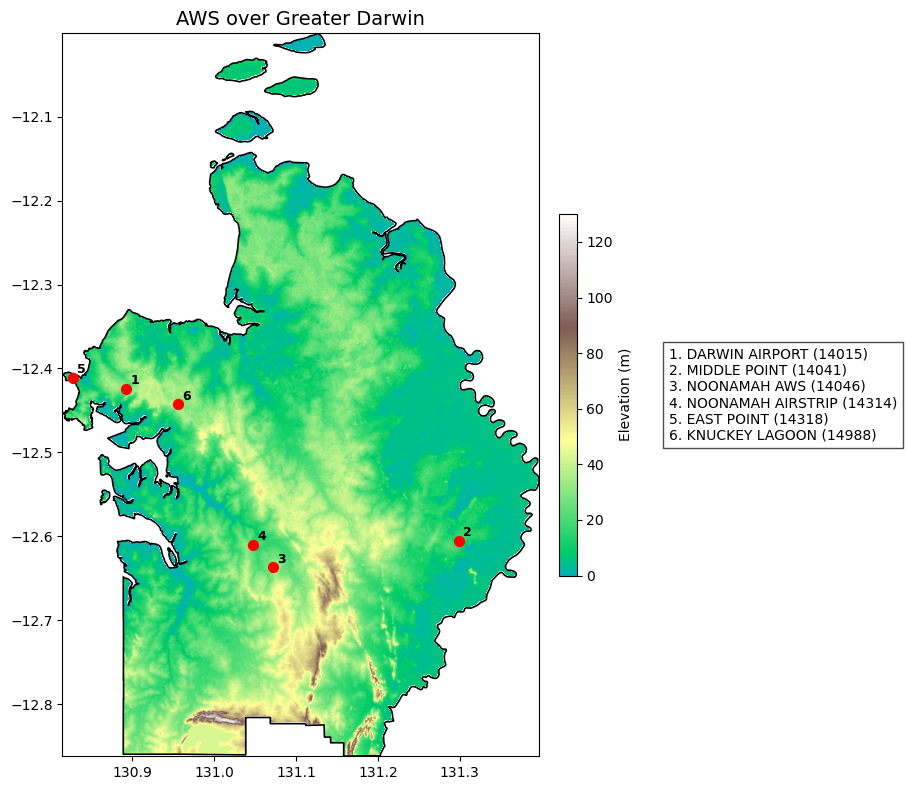

In [17]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.mask import mask
from shapely.geometry import box
import numpy as np
import pandas as pd
from matplotlib import colors
# === File paths ===
file_path    = '/g/data/w28/yk8692/nesp'
tif_path     = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path     = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
# region_name  = "Greater Adelaide"
region_list = ["Greater Melbourne", "Greater Sydney", "Greater Perth", "Greater Brisbane", 
               "Greater Adelaide", "Greater Hobart", "Greater Darwin", "Australian Capital Territory"]

for region_name in region_list:
    # === Load shapefile and filter for region ===
    gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
    region_shape = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]

    if region_name in ['Greater Sydney']:
        
        # === Load and filter AWS stations ===
        stations_df = pd.read_excel(station_path, engine='openpyxl')
        # === Define 16 selected stations by Lat/Lon ===
        selected_coords = [
            (-33.6004, 150.7761),
            (-34.039, 150.689),
            (-33.8338, 151.0718),
            (-33.6908, 151.2253),
            (-33.851, 150.8567),
            (-33.2814, 151.5766),
            (-33.9057, 151.1134),
            (-34.0615, 150.7735),
            (-33.2894, 151.2107),
            (-33.9465, 151.1731),
            (-33.6185, 150.2741),
            (-33.9925, 150.9489),
            (-33.9176, 150.9837),
            (-33.4351, 151.3614),
            (-33.8969, 150.7281),
            (-33.7195, 150.6783),
        ]
        
        # Round to 4 decimal places and filter the dataframe
        stations_df["lat_rounded"] = stations_df["Latitude"].round(4)
        stations_df["lon_rounded"] = stations_df["Longitude"].round(4)
        
        selected_df = stations_df[
            stations_df.apply(lambda row: (round(row["Latitude"], 4), round(row["Longitude"], 4)) in selected_coords, axis=1)
        ].copy()
        
        
        # Convert selected to GeoDataFrame
        stations_gdf = gpd.GeoDataFrame(
            selected_df,
            geometry=gpd.points_from_xy(selected_df['Longitude'], selected_df['Latitude']),
            crs='EPSG:4326'
        )
        stations_in_region = stations_gdf.reset_index(drop=True)
        stations_in_region["Index"] = range(1, len(stations_in_region) + 1)
    else:
        # === Load and filter AWS stations ===
        stations_df = pd.read_excel(station_path, engine='openpyxl')
        stations_gdf = gpd.GeoDataFrame(
            stations_df,
            geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
            crs='EPSG:4326'
        )
        stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)
        stations_in_region["Index"] = range(1, len(stations_in_region) + 1)
    
    # === Mask raster to region ===
    with rasterio.open(tif_path) as src:
        out_image, out_transform = mask(src, region_shape.geometry, crop=True)
        out_meta = src.meta.copy()
        nodata = src.nodata
    
    # === Prepare DEM array ===
    elevation = out_image[0].astype(float)
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan  # fallback in case nodata missing
    
    # === Calculate raster extent ===
    left = out_transform[2]
    top = out_transform[5]
    right = left + out_transform[0] * elevation.shape[1]
    bottom = top + out_transform[4] * elevation.shape[0]
    extent = [left, right, bottom, top]
    
    terrain = plt.get_cmap('terrain')
    new_terrain = colors.LinearSegmentedColormap.from_list(
        "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
    )
    
    # === Plot ===
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot DEM
    im = ax.imshow(
        elevation,
        cmap=new_terrain,
        extent=extent,
        origin='upper',
        vmin=0  # start color scale at 0 m
    )
    
    # Plot region boundary
    region_shape.boundary.plot(ax=ax, color='black', linewidth=1.2)
    
    # Plot AWS points
    stations_in_region.plot(ax=ax, color='red', markersize=50, zorder=3)
    
    # Annotate AWS index
    for i, row in stations_in_region.iterrows():
        if i == 10:
            loc = -10
        else:
            loc = 3
        ax.annotate(
            text=str(row["Index"]),
            xy=(row.geometry.x, row.geometry.y),
            xytext=(3, loc),
            textcoords="offset points",
            fontsize=9,
            color="black",
            weight="bold"
        )
    
    # Title and colorbar
    ax.set_title(f"AWS over {region_name}", fontsize=14)
    plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.5, pad=0.02)
    # Create a separate station list on the side
    station_list_text = "\n".join([f"{row.Index}. {row['Station_name']} ({row['Station_number']})" for _, row in stations_in_region.iterrows()])
    plt.figtext(0.95, 0.5, station_list_text, fontsize=10, ha="left", va="center", bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_station_map.png", dpi=300, bbox_inches='tight')
    
    # plt.show()


/jobfs/143155789.gadi-pbs/ipykernel_2584116/1903490115.py:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)


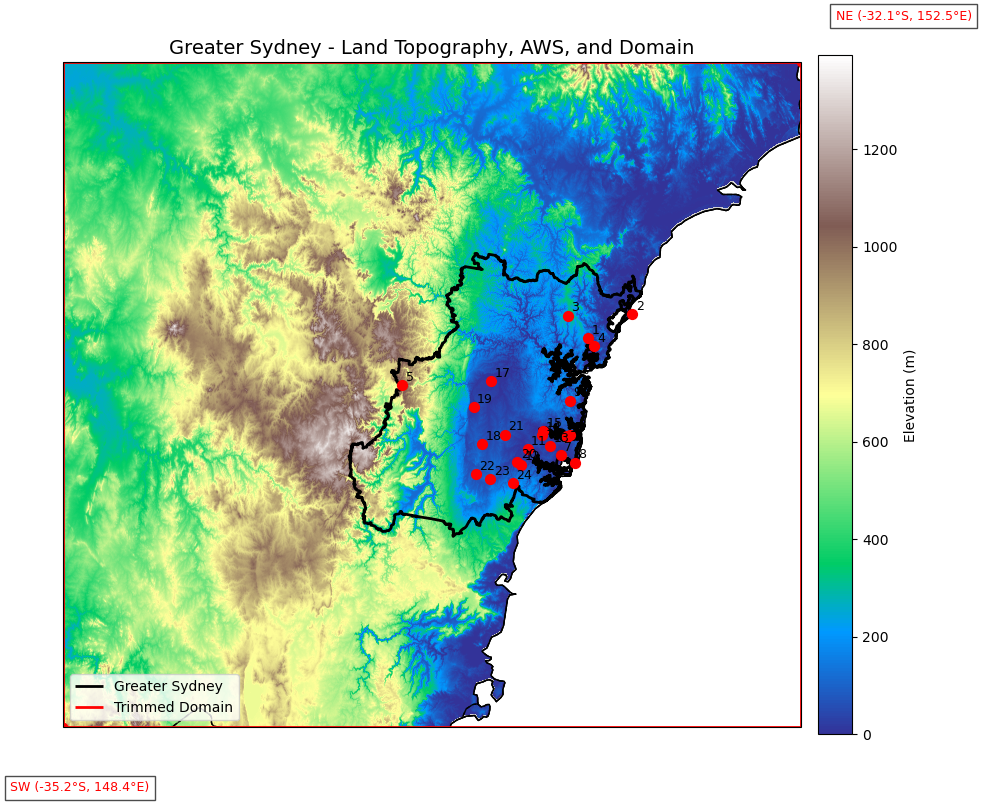

In [5]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Melbourne"

# === Load GCCSA shapefile and filter for region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region_shape = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region_shape.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create buffer box around region ===
buffer_w_km, buffer_e_km = 180, 100
buffer_s_km, buffer_n_km = 100, 100
deg_per_km = 1 / 111.0
minx, miny, maxx, maxy = region_shape.total_bounds
west   = minx - buffer_w_km * deg_per_km
east   = maxx + buffer_e_km * deg_per_km
south  = miny - buffer_s_km * deg_per_km
north  = maxy + buffer_n_km * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Load raster and extract DEM in domain ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan
    # Build extent
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]

    # === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([west, east, south, north], crs=ccrs.PlateCarree())

# Base map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')
terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.25, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region_shape.boundary.plot(ax=ax, edgecolor='k', linewidth=2, transform=ccrs.PlateCarree(), label=region_name)

# Domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label='Trimmed Domain')

# Annotate corners
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS stations
stations_in_region.plot(ax=ax, color='red', markersize=50, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=9,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final elements
ax.set_title(f"{region_name} - Land Topography, AWS, and Domain", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


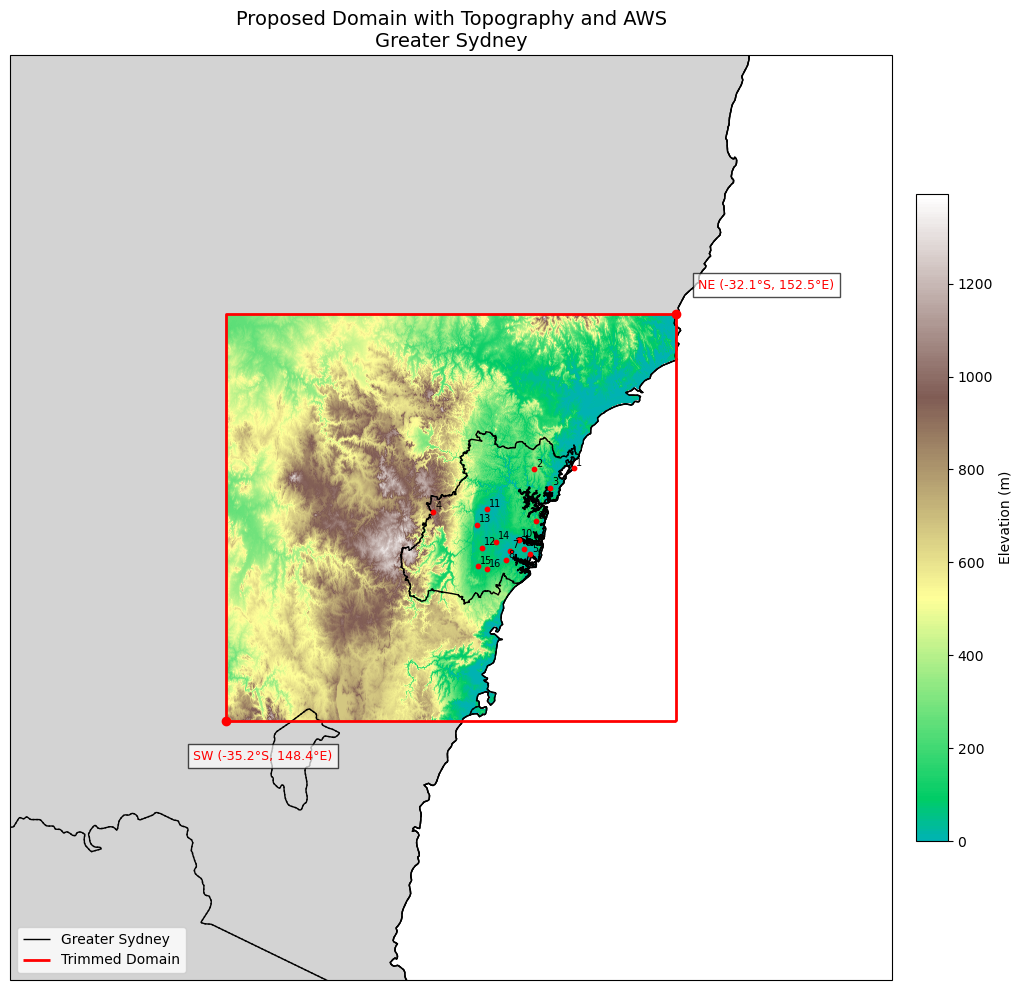

In [18]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path      = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Sydney"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
# === Define 16 selected stations by Lat/Lon ===
selected_coords = [
    (-33.6004, 150.7761),
    (-34.039, 150.689),
    (-33.8338, 151.0718),
    (-33.6908, 151.2253),
    (-33.851, 150.8567),
    (-33.2814, 151.5766),
    (-33.9057, 151.1134),
    (-34.0615, 150.7735),
    (-33.2894, 151.2107),
    (-33.9465, 151.1731),
    (-33.6185, 150.2741),
    (-33.9925, 150.9489),
    (-33.9176, 150.9837),
    (-33.4351, 151.3614),
    (-33.8969, 150.7281),
    (-33.7195, 150.6783),
]

# Round to 4 decimal places and filter the dataframe
stations_df["lat_rounded"] = stations_df["Latitude"].round(4)
stations_df["lon_rounded"] = stations_df["Longitude"].round(4)

selected_df = stations_df[
    stations_df.apply(lambda row: (round(row["Latitude"], 4), round(row["Longitude"], 4)) in selected_coords, axis=1)
].copy()


# Convert selected to GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    selected_df,
    geometry=gpd.points_from_xy(selected_df['Longitude'], selected_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf.reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 180, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)
# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/801713603.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


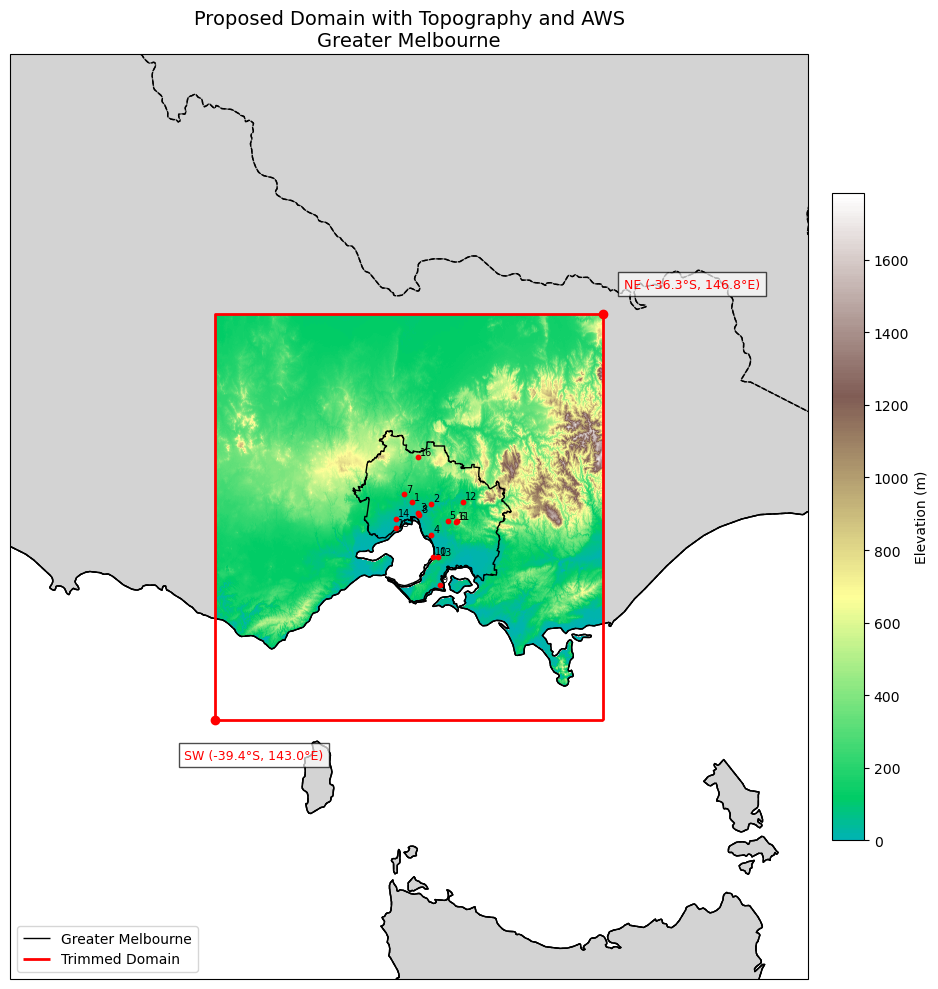

In [19]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Melbourne"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 150, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/2004612422.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


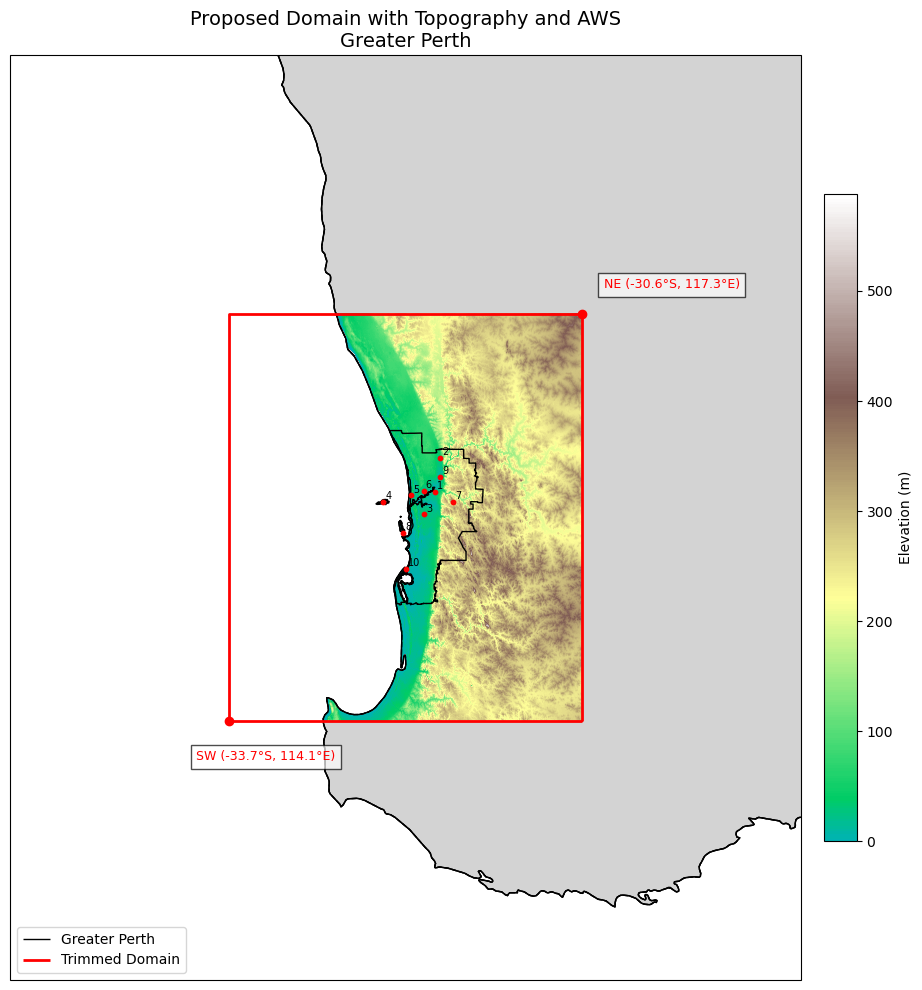

In [20]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Perth"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 150, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/3017294876.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


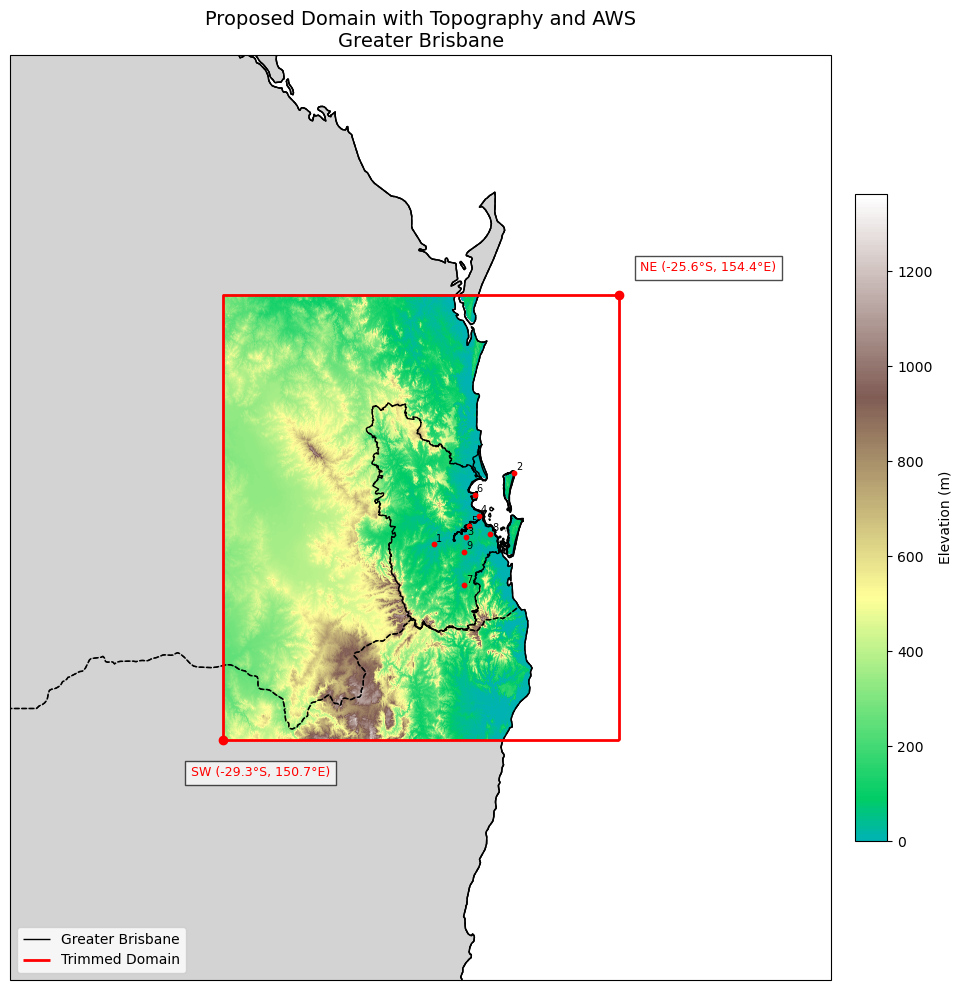

In [21]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Brisbane"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 150, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/4063296473.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


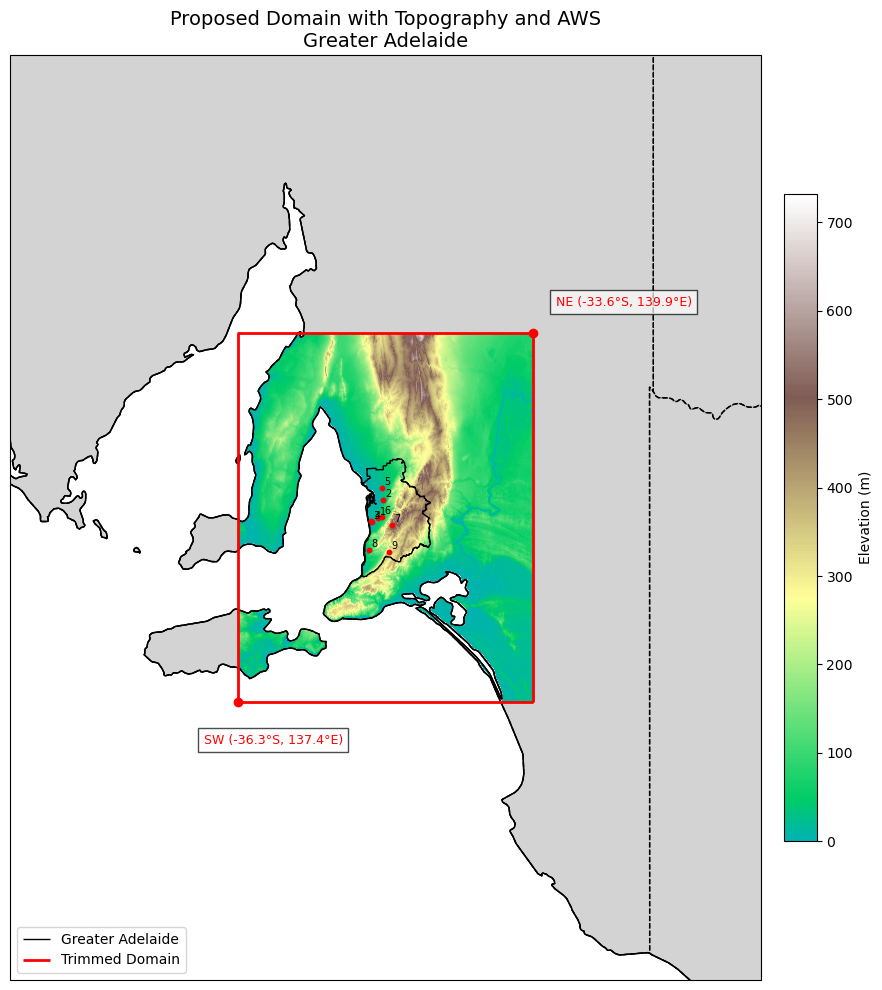

In [22]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Adelaide"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 120, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/3045250284.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


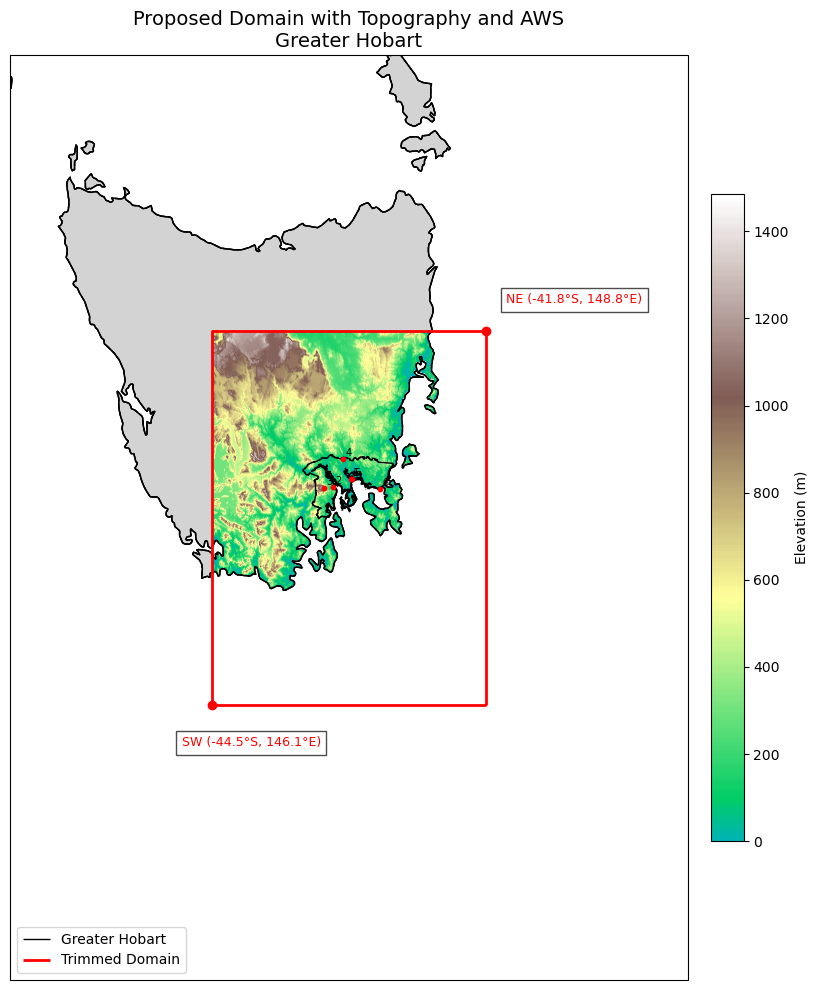

In [23]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Hobart"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 100, "E": 100, "S": 150, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


/jobfs/143300566.gadi-pbs/ipykernel_3289912/3138535304.py:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)


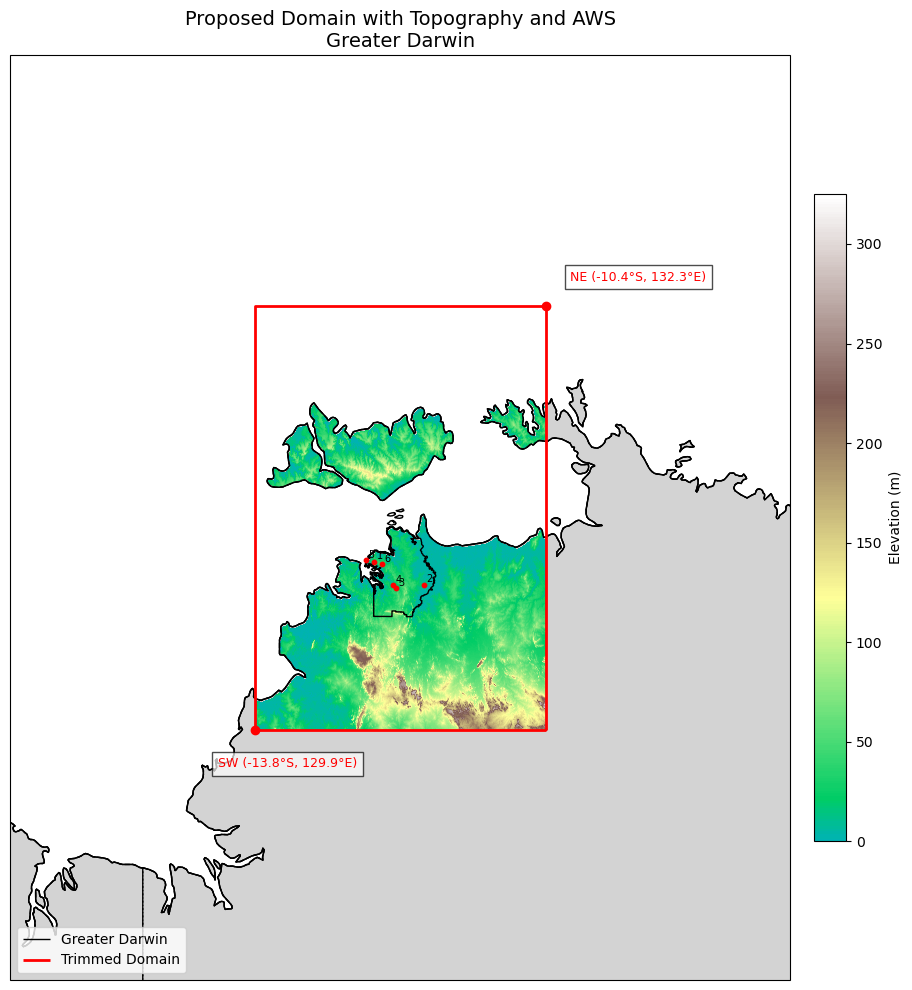

In [24]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Greater Darwin"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 100, "E": 100, "S": 100, "N": 180}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)
# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp_backup'
tif_path      = 'f"{file_path}/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = f"{file_path}/auckland/statsnz-territorial-authority-2025-clipped-SH_auckland_buffer-km-100_wgs84_env.shp"
# station_path  = f"{file_path}/station/All_stations_information.xlsx"
region_name   = "Auckland"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 100, "E": 100, "S": 100, "N": 180}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)
# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
## import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.features import geometry_mask

# === File paths ===
file_path     = '/g/data/w28/yk8692/nesp'
tif_path      = '/g/data/w28/yk8692/nesp/figure/minimum_domains/srtm-1sec-dem-v1-COG.tif'
shp_path      = "/g/data/w28/yk8692/nesp/testing_script/GCCSA_2021_AUST_SHP_GDA2020/GCCSA_2021_AUST_GDA2020.shp"
station_path  = "/g/data/w28/yk8692/nesp/station/All_stations_information.xlsx"
region_name   = "Australian Capital Territory"

# === Load shapefile and filter region ===
gccsa = gpd.read_file(shp_path).to_crs(epsg=4326)
region = gccsa[gccsa["GCC_NAME21"].str.contains(region_name, case=False)]
minx, miny, maxx, maxy = region.total_bounds

# === Load and filter AWS stations ===
stations_df = pd.read_excel(station_path, engine='openpyxl')
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['Longitude'], stations_df['Latitude']),
    crs='EPSG:4326'
)
stations_in_region = stations_gdf[stations_gdf.within(region.unary_union)].reset_index(drop=True)
stations_in_region["Index"] = range(1, len(stations_in_region) + 1)

# === Create directional buffer box ===
buffer_km = {"W": 150, "E": 100, "S": 100, "N": 100}
deg_per_km = 1 / 111.0
west  = minx - buffer_km["W"] * deg_per_km
east  = maxx + buffer_km["E"] * deg_per_km
south = miny - buffer_km["S"] * deg_per_km
north = maxy + buffer_km["N"] * deg_per_km
domain_box = box(west, south, east, north)
domain_gdf = gpd.GeoDataFrame(geometry=[domain_box], crs="EPSG:4326")

# === Read full raster in bounding box ===
with rasterio.open(tif_path) as src:
    window = src.window(west, south, east, north)
    transform = src.window_transform(window)
    elevation = src.read(1, window=window).astype(float)
    nodata = src.nodata
    if nodata is not None:
        elevation[elevation == nodata] = np.nan
    else:
        elevation[elevation > 1e5] = np.nan

    # === Calculate extent for the DEM image ===
    extent = [
        transform[2],
        transform[2] + transform[0] * elevation.shape[1],
        transform[5] + transform[4] * elevation.shape[0],
        transform[5]
    ]
# === Create land mask from Natural Earth land polygons ===
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m')
    land_shapes = list(land.geometries())
    land_mask = geometry_mask(
        [g for g in land_shapes],
        transform=transform,
        invert=True,
        out_shape=elevation.shape
    )
    elevation[~land_mask] = np.nan  # Mask ocean area

# === Plot ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Wider extent around the domain
extra_deg = 2.0
ax.set_extent([west - extra_deg, east + extra_deg, south - extra_deg, north + extra_deg], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')

terrain = plt.get_cmap('terrain')
new_terrain = colors.LinearSegmentedColormap.from_list(
    "modified_terrain", terrain(np.linspace(0.20, 1, 256))  # skip blue
)
# Plot DEM only over land
im = ax.imshow(
    elevation,
    cmap=new_terrain,
    extent=extent,
    origin='upper',
    vmin=0,
    transform=ccrs.PlateCarree()
)

# Region boundary
region.boundary.plot(ax=ax, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree(), label=region_name)

# Red domain box
domain_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, transform=ccrs.PlateCarree(), label="Trimmed Domain")

# Corner labels
sw_lon, sw_lat, ne_lon, ne_lat = domain_box.bounds
ax.plot(sw_lon, sw_lat, 'ro', transform=ccrs.PlateCarree())
ax.plot(ne_lon, ne_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(sw_lon - 0.3, sw_lat - 0.3, f"SW ({sw_lat:.1f}°S, {sw_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))
ax.text(ne_lon + 0.2, ne_lat + 0.2, f"NE ({ne_lat:.1f}°S, {ne_lon:.1f}°E)", fontsize=9, color='red',
        transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.7))

# AWS station points
stations_in_region.plot(ax=ax, color='red', markersize=10, zorder=3, transform=ccrs.PlateCarree())
for i, row in stations_in_region.iterrows():
    ax.text(
        row.geometry.x + 0.02,
        row.geometry.y + 0.02,
        str(row["Index"]),
        fontsize=7,
        color="black",
        transform=ccrs.PlateCarree()
    )

# Final labels
ax.set_title(f"Proposed Domain with Topography and AWS\n{region_name}", fontsize=14)
plt.colorbar(im, ax=ax, label="Elevation (m)", shrink=0.7, pad=0.02)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(f"{file_path}/figure/{region_name}_aws_topo_domain_map.png", dpi=300, bbox_inches='tight')

plt.show()
